# Case Study on sample sentence

In [40]:
sentence = "The sky is as blue as ocean"

## Tokenization and POS Tagging

In [2]:
import nltk
from nltk import *
from nltk.tag.stanford import StanfordPOSTagger
from nltk.tokenize import word_tokenize

In [41]:
java_path = "C:/Program Files/Java/jdk-18.0.1.1/bin/java.exe"
os.environ["JAVAHOME"] = java_path

jar = "C:/Users/Public/utility/stanford-postagger-full-2020-11-17/stanford-postagger.jar"
model = "C:/Users/Public/utility/stanford-postagger-full-2020-11-17/models/english-bidirectional-distsim.tagger"

In [42]:
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf-8")

In [43]:
# Tokenization
words = nltk.word_tokenize(sentence)
print(words)

['The', 'sky', 'is', 'as', 'blue', 'as', 'ocean']


In [44]:
tagged_words = pos_tagger.tag(words)
print(tagged_words)

[('The', 'DT'), ('sky', 'NN'), ('is', 'VBZ'), ('as', 'RB'), ('blue', 'JJ'), ('as', 'IN'), ('ocean', 'NN')]


## Dependency Parsing

In [7]:
from nltk.parse.stanford import StanfordDependencyParser

In [45]:
# Path to CoreNLP jar unzipped
jar_path = 'C:/Users/Public/utility/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = 'C:/Users/Public/utility/stanford-corenlp-4.2.2-models-english.jar'

In [46]:
print(sentence)

The sky is as blue as ocean


In [47]:
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

C:\Users\sanmeet\AppData\Local\Temp/ipykernel_5388/3030454391.py:1: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


In [48]:
# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()

In [49]:
print(dependency)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x0000027B117EA280>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'root': [5]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'DT',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 2,
                 'lemma': '_',
                 'rel': 'det',
                 'tag': 'DT',
                 'word': 'The'},
             2: {'address': 2,
                 'ctag': 'NN',
                 'deps': defaultdict(<class 'list'>, {'det': [1]}),
                 'feats': '_',
                 'head': 5,
                 'lemma': '_',
                 'rel': 'nsubj',
                 'tag': 'NN',
    

In [13]:
import pandas as pd

In [50]:
df_dep_parsed = pd.DataFrame(columns=['Head','Head POS','Relation','Dependent','Dependent POS'])
print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)

# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
    row = {'Head':str(dep[0][0]),'Head POS':str(dep[0][1]),'Relation':str(dep[1]),'Dependent':str(dep[2][0]),'Dependent POS':str(dep[2][1])}
    df_dep_parsed = df_dep_parsed.append(row, ignore_index=True)
    print("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
blue            | JJ         | nsubj      | sky             | NN        
sky             | NN         | det        | The             | DT        
blue            | JJ         | cop        | is              | VBZ       
blue            | JJ         | advmod     | as              | RB        
blue            | JJ         | obl        | ocean           | NN        
ocean           | NN         | case       | as              | IN        


### Visualize Dependency Parsing 

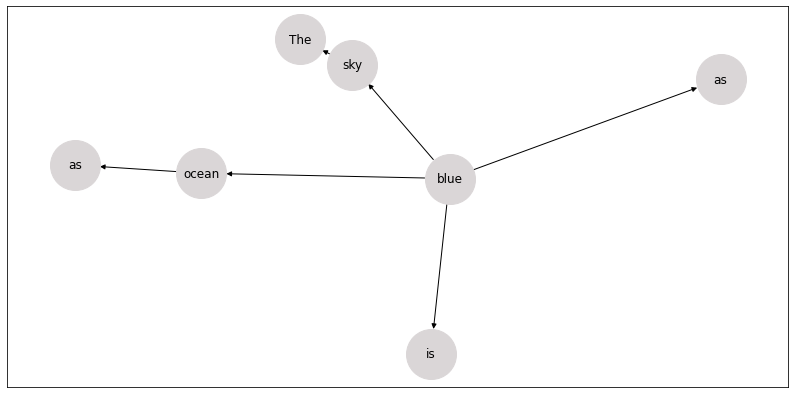

In [51]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
# nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)
plt.figure(3,figsize=(14,7)) 
nx.draw_networkx(G, with_labels=True, labels=labels, node_size=2500, node_color='#dad6d7', font_size=12)

In [52]:
!pip install graphviz
from graphviz import Source
dot_def = dependency.to_dot()
print(dot_def)

source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label="0 (None)"]
0 -> 5 [label="root"]
1 [label="1 (The)"]
2 [label="2 (sky)"]
2 -> 1 [label="det"]
3 [label="3 (is)"]
4 [label="4 (as)"]
5 [label="5 (blue)"]
5 -> 2 [label="nsubj"]
5 -> 3 [label="cop"]
5 -> 4 [label="advmod"]
5 -> 7 [label="obl"]
6 [label="6 (as)"]
7 [label="7 (ocean)"]
7 -> 6 [label="case"]
}


'dependency_graph.png'

## Concept-Attribute Collocations

In [53]:
# POS labels of nouns, pronouns, adjectives and verbs
nouns = ['NN', 'NNP', 'NNS', 'NNPS']
pronouns = ['PRP', 'PRP$']
adjectives = ['JJ', 'JJR', 'JJS']
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

In [54]:
verb_to_noun = []
adj_to_noun = []
verb_to_adj = []
noun_to_adj = []

noun_and_adj = []

index = 1

def composition_of_pattern(lst1, lst2):
    result = []
    for x in lst1:
        for y in lst2:
            if x["Head"] == y["Head"] and x["Head POS"] == y["Head POS"]:
                result.append(pandas.Series({"Sr.No.":x["Sr.No."], "Dependent1":x["Dependent"], "Dependent1 POS":x["Dependent POS"], "Relation":"SBV_VOB", "Common Verb": x["Head"], "Common Verb POS": x["Head POS"], "Dependent2":y["Dependent"], "Dependent2 POS":y["Dependent POS"]}))

    for item in result:
        for x in lst1:
            if item["Common Verb"] == x["Head"] and item["Common Verb POS"] == x["Head POS"] and item["Dependent1"] == x["Dependent"] and item["Dependent1 POS"] == x["Dependent POS"]:
                if not bool(lst1):
                    lst1.remove(x)
        for y in lst2:
            if item["Common Verb"] == y["Head"] and item["Common Verb POS"] == y["Head POS"] and item["Dependent2"] == y["Dependent"] and item["Dependent2 POS"] == y["Dependent POS"]:
                if not bool(lst2):
                    lst2.remove(y)
                    
    return result

collocations = pd.DataFrame(columns=['Concept','Attribute'])
item = df_dep_parsed

for i in range(item.shape[0]):
    if item.loc[i]["Head POS"] in verbs and (item.loc[i]["Dependent POS"] in nouns or item.loc[i]["Dependent POS"] in pronouns):
        verb_to_noun.append(item.loc[i])
    if item.loc[i]["Head POS"] in adjectives and (item.loc[i]["Dependent POS"] in nouns or item.loc[i]["Dependent POS"] in pronouns):
        adj_to_noun.append(item.loc[i])
    if item.loc[i]["Head POS"] in verbs and item.loc[i]["Dependent POS"] in adjectives:
        verb_to_adj.append(item.loc[i])
    if (item.loc[i]["Head POS"] in nouns or item.loc[i]["Head POS"] in pronouns) and item.loc[i]["Dependent POS"] in adjectives:
        noun_to_adj.append(item.loc[i])

noun_and_adj = composition_of_pattern(verb_to_noun, verb_to_adj)

# Head: Verb, Dependent: Noun
for m in verb_to_noun:
    collocations=collocations.append({'Concept':m["Dependent"].lower(),'Attribute':m["Head"].lower()},ignore_index=True)

# Head: Adjective, Dependent: Noun
for m in adj_to_noun:
    row = {'Concept':m["Dependent"].lower(),'Attribute':m["Head"].lower()}
    collocations=collocations.append(row,ignore_index=True)

#     # Head: Verb, Dependent: Adjective
#     for m in verb_to_adj:
#         sheet21.write(index, 0, m["Dependent"].lower())
#         sheet21.write(index, 1, m["Head"].lower())
#         index += 1

# Head: Noun, Dependent: Adjective
for m in noun_to_adj:
    collocations=collocations.append({'Concept':m["Head"].lower(),'Attribute':m["Dependent"].lower()},ignore_index=True)

for m in noun_and_adj:
    collocations=collocations.append({'Concept':m["Dependent1"].lower(),'Attribute':m["Dependent2"].lower()},ignore_index=True)
    
print(collocations)

  Concept Attribute
0     sky      blue
1   ocean      blue


## Creating Knowledge Graph Triple

In [19]:
import spacy

In [20]:
nlp = spacy.load("en_core_web_sm")

In [55]:
all_stopwords = nlp.Defaults.stop_words
# print(all_stopwords)

In [56]:
# get noun chunks
def get_noun_phrase(sentence):
    nlp = spacy.load("en_core_web_sm")
    nlp_sentence = nlp(sentence)
    chunks = list(nlp_sentence.noun_chunks)
    return chunks

In [57]:
helping_verbs = ['be', 'can', 'could', 'dare', 'do', 'have', 'may', 'might', 'must', 'need', 'ought', 'shall', 'should', 'will', 'would']

In [58]:
print(sentence)

The sky is as blue as ocean


In [59]:
target = ""
attribute = ""
source = ""

sentence = sentence.lower()
        
# for simile sentences having 'as' as a comparator
if sentence.count(' as ') == 2:
    start = sentence.find(' as ')
    end = sentence.rfind(' as ')

    # +4 for skipping ' as '
    attribute = sentence[start+4:end].strip()

    target_noun_phrases = get_noun_phrase(sentence[:start])
    source_noun_phrases = get_noun_phrase(sentence[end+4:])

    if(len(target_noun_phrases) == 0):
        words = nltk.word_tokenize(sentence[:start])
        tagged_words = pos_tagger.tag(words)
        for each in tagged_words:
            if each[1] in nouns or each[1] in pronouns:
                target = each[0]
    else:
        target_noun_phrases_lst = word_tokenize(str(target_noun_phrases[0]).strip())
        if len(target_noun_phrases_lst) > 1:
            target_noun_phrases_lst_without_sw = [word for word in target_noun_phrases_lst if not word in all_stopwords]
            target = ' '.join(target_noun_phrases_lst_without_sw)
        else:
            target = target_noun_phrases_lst[0]
    if(len(source_noun_phrases) == 0):
        words = nltk.word_tokenize(sentence[end+4:])
        tagged_words = pos_tagger.tag(words)
        for each in tagged_words:
            if each[1] in nouns or each[1] in pronouns:
                source = each[0]
    else:
        source_noun_phrases_lst = word_tokenize(str(source_noun_phrases[0]).strip())
        if len(source_noun_phrases_lst) > 1:
            source_noun_phrases_lst_without_sw = [word for word in source_noun_phrases_lst if not word in all_stopwords]
            source = ' '.join(source_noun_phrases_lst_without_sw)
        else:
            source = source_noun_phrases_lst[0]

# for simile sentences having 'like' as a comparator
if sentence.count(' like ') == 1:
    like_index = sentence.find(' like ')
    before_like = sentence[:like_index]
    after_like = sentence[like_index+6:]

    words = nltk.word_tokenize(before_like)
    tagged_words = pos_tagger.tag(words)

    for each in tagged_words:
        if each[1] in adjectives:
            attribute = each[0]
        elif each[1] in verbs:
            present_form = WordNetLemmatizer().lemmatize(each[0],'v')
            if present_form not in helping_verbs:
                attribute = present_form

    attribute_index = before_like.find(attribute)
    target_noun_phrases = get_noun_phrase(before_like[:attribute_index])
    source_noun_phrases = get_noun_phrase(after_like)

    if(len(target_noun_phrases) == 0):
        words = nltk.word_tokenize(before_like[:attribute_index])
        tagged_words = pos_tagger.tag(words)
        for each in tagged_words:
            if each[1] in nouns or each[1] in pronouns:
                target = each[0]
    else:
        target_noun_phrases_lst = word_tokenize(str(target_noun_phrases[0]).strip())
        if len(target_noun_phrases_lst) > 1:
            target_noun_phrases_lst_without_sw = [word for word in target_noun_phrases_lst if not word in all_stopwords]
            target = ' '.join(target_noun_phrases_lst_without_sw)
        else:
            target = target_noun_phrases_lst[0]

    if(len(source_noun_phrases) == 0):
        words = nltk.word_tokenize(after_like)
        tagged_words = pos_tagger.tag(words)
        for each in tagged_words:
            if each[1] in nouns or each[1] in pronouns:
                source = each[0]
    else:
        source_noun_phrases_lst = word_tokenize(str(source_noun_phrases[0]).strip())
        if len(source_noun_phrases_lst) > 1:
            source_noun_phrases_lst_without_sw = [word for word in source_noun_phrases_lst if not word in all_stopwords]
            source = ' '.join(source_noun_phrases_lst_without_sw)
        else:
            source = source_noun_phrases_lst[0]

print("Target: {}\nAttribute: {}\nSource: {}".format(target, attribute, source))      

Target: sky
Attribute: blue
Source: ocean


In [60]:
with open("sample.txt", "w") as f:
    f.write('CREATE' + '\n')
    target_set = set()
    source_set = set()

    target_value = ""
    target_var = ""
    attribute_value = ""
    attribute_var = ""
    source_value = ""
    source_var = ""

    target_value = target
    attribute_value = attribute
    source_value = source

    # '-' is to be replaced by ' ' as it is not allowed in variable name in Neo4j
    if target_value.find('-') != -1:
        target_value = target_value.replace('-', ' ')
    if attribute_value.find('-') != -1:
        attribute_value = attribute_value.replace('-', ' ')
    if source_value.find('-') != -1:
        source_value = source_value.replace('-', ' ')

    # "'" is to be replaced by "" as it is not allowed in variable name in Neo4j
    if target_value.find("'"):
        target_value = target_value.replace("'", "")
    if attribute_value.find("'"):
        attribute_value = attribute_value.replace("'", "")
    if attribute_value.find("'"):
        attribute_value = attribute_value.replace("'", "")
        
    # Stanford POS tagging
    words = nltk.word_tokenize(target_value)
    target_tagged_words = pos_tagger.tag(words)

    words = nltk.word_tokenize(source_value)
    source_tagged_words = pos_tagger.tag(words)

    words = nltk.word_tokenize(attribute_value)
    attribute_tagged_words = pos_tagger.tag(words)

    target_var = '_'.join((target_value).split())
    attribute_var = '_'.join((attribute_value).split())
    source_var = '_'.join((source_value).split())

    target_var = target_var + "_t"
    if target_var not in target_set:
#         f.write('(' + target_var + ':TARGET{value:"' + target_value + '"}),' + '\n')
        f.write('(' + target_var + ':TARGET{value:"' + target_value + '",pos_tag:"' + target_tagged_words[0][-1] + '"}),' + '\n')
        target_set.add(target_var)
        
    source_var = source_var + "_s"
    if source_var not in source_set:
#         f.write('(' + source_var + ':SOURCE{value:"' + source_value + '"}),' + '\n')
        f.write('(' + source_var + ':SOURCE{value:"' + source_value + '",pos_tag:"' + source_tagged_words[0][-1] + '"}),' + '\n')
        source_set.add(source_var)
        
    f.write('(' + source_var + ')-[:ATTRIBUTE {value:"' + attribute_value + '",pos_tag:"' + attribute_tagged_words[0][1] + '"}]->('+ target_var + ');' + '\n')

## Load the saved Bi-LSTM model for prediction

In [27]:
# load model
from keras import models
model = models.load_model('../model_keras/model.h5')

#### Prerequisites

In [28]:
from keras.utils import pad_sequences
import numpy as np

In [29]:
triples = [(target, attribute, source)]
concepts = [(collocations["Concept"][0], collocations["Attribute"][0])]

In [30]:
%store -r vocab

In [31]:
print(vocab)
# Assign unique IDs to words in vocabulary
word_to_id = {word: i for i, word in enumerate(vocab)}

['organized', 'thicket', 'wax statues', 'Essential Oils', 'train station', 'brother', 'royal feast', 'sleek', 'thick tree branch', 'chaotic dance', 'Harvest Time', 'skilled explorer', 'fragrant aroma', 'thunderbolt', 'project', 'Compact', 'doll eyes', 'Intellectual Analysis', 'race car', 'harp playing', 'Absorbent', 'pair', 'swoop', 'night', 'act', 'gather', 'swim', 'boats', 'cockroach antennae', 'dusky cheek', 'soul', 'snow', 'flame', 'ant', 'pin', 'Animated', 'Refreshing', 'Cozy', 'shark', 'wedding reception', 'fine lace', 'comb', 'Design Aesthetics', 'knight', 'roaring ocean', 'seagulls', 'thousand knives', 'pain', 'Sandwich', 'torrent', 'Artistic', 'past', 'bad smell', 'tack', 'sponge', 'High Definition', 'annoying', 'ants', 'slippery eel', 'calming', 'mountain goat', 'pride', 'puff', 'mother', 'room', 'computer', 'Fashion Industry', 'Sweet', 'melted butter', 'butter', 'Multi-purpose Design', 'old man hand', 'building', 'filing cabinet', 'goat', 'fallen fragment', 'bird beak', 'kin

In [32]:
# Encode triples and concepts with unique IDs
encoded_triples = [[word_to_id[word] for word in triple] for triple in triples]
encoded_concepts = [[word_to_id[word] for word in concept] for concept in concepts]
# Pad encoded sequences
max_length = max(len(seq) for seq in encoded_triples + encoded_concepts)
padded_triples = pad_sequences(encoded_triples, maxlen=max_length, padding='post')
padded_concepts = pad_sequences(encoded_concepts, maxlen=max_length, padding='post')

#### Prediction

In [33]:
y_pred = model.predict([padded_triples, padded_concepts])

1/1 [==============================] - 3s 3s/step


In [34]:
np.round(y_pred).astype(int).flatten()

array([1])

## Neo4j Graph Querying (Attribute Prediction)

In [35]:
from neo4j import __version__ as neo4j_version
from pandas import DataFrame
print(neo4j_version)

5.8.0


In [36]:
from neo4j import GraphDatabase

In [37]:
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response

In [38]:
# create an instance of connection with the parameters
# conn = Neo4jConnection(uri="bolt://localhost:7687", user="neo4j", pwd="metaphorkb2")
conn = Neo4jConnection(uri="bolt://localhost:7687", user="neo4j", pwd="12345678")

In [39]:
query_string = '''
MATCH (s:SOURCE)-[attr:ATTRIBUTE]->(t:TARGET)
WHERE t.value =~ '.*{target}.*' AND s.value =~ '.*{source}.*'
RETURN t.value, attr.value, s.value
'''.format(target=target, source=source)
# print(conn.query(query_string, db='neo4j'))
dtf_data = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
possible_attributes = set(dtf_data["attr.value"])

print("Possible Attributes for target '{target}' and source '{source}' are:\n".format(target=target, source=source))
lst = list(possible_attributes)
for i in range(len(lst)):
    print(lst[i])

Possible Attributes for target 'lake' and source 'crystal' are:

clear
